In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [3]:
y = np.random.random(100)
x = np.arange(len(y))

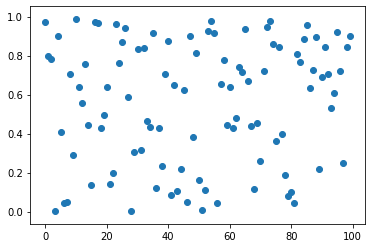

In [4]:
plt.scatter(x,y)

In [5]:
y[14] = 3
y[83] = 10

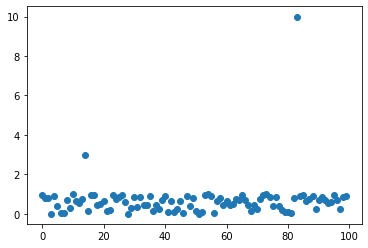

In [6]:
plt.scatter(x,y)

# Grubbs Statistics Function to Compute Test Statistic Value

In [7]:
def grubbs_stat(y):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations/ std_dev
    print("Grubbs Statistics Value : {}".format(Gcal))
    return Gcal, max_ind

# Calculating Critical Value using Alpha(confidence interval)

In [8]:
def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    print("Grubbs Critical Value: {}".format(critical_value))
    return critical_value

# Check if Test statistic is greater than Critical value

In [9]:
def check_G_values(Gs, Gc, inp, max_index):
    if Gs > Gc:
        print('{} is an outlier. G > G-critical: {:.4f} > {:.4f} \n'.format(inp[max_index], Gs, Gc))
    else:
        print('{} is not an outlier. G > G-critical: {:.4f} > {:.4f} \n'.format(inp[max_index], Gs, Gc))

# Extreme Studentize Function 

In [ ]:
#Importance	Many statistical techniques are sensitive to the presence of outliers.
#For example, simple calculations of the mean and standard deviation may be distorted by a single grossly inaccurate data point.
#Checking for outliers should be a routine part of any data analysis.
#Potential outliers should be examined to see if they are possibly erroneous. 
#If the data point is in error, it should be corrected if possible and deleted if it is not possible. 
#If there is no reason to believe that the outlying point is in error, it should not be deleted without careful consideration.
#However, the use of more robust techniques may be warranted.
#Robust techniques will often downweight the effect of outlying points without deleting them.

In [10]:
def ESD_Test(input_series, alpha, max_outliers):
    for iterations in range(max_outliers):
        Gcritical = calculate_critical_value(len(input_series), alpha)
        Gstat, max_index = grubbs_stat(input_series)
        check_G_values(Gstat, Gcritical, input_series, max_index)
        input_series = np.delete(input_series, max_index)

In [11]:
ESD_Test(y, 0.05, 3)

Grubbs Critical Value: 3.384082902288351
Grubbs Statistics Value : 9.17040836401495
10.0 is an outlier. G > G-critical: 9.1704 > 3.3841 

Grubbs Critical Value: 3.380650508067058
Grubbs Statistics Value : 6.093832914098781
3.0 is an outlier. G > G-critical: 6.0938 > 3.3807 

Grubbs Critical Value: 3.377175980782947
Grubbs Statistics Value : 1.7779934504025248
0.001758757979715142 is not an outlier. G > G-critical: 1.7780 > 3.3772 

